## AdaBoost

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
sns.set_style('white')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

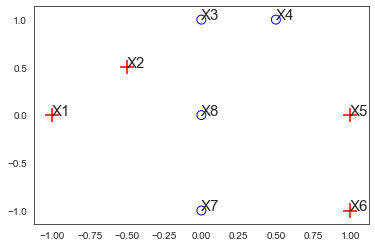

In [2]:
df = pd.read_csv("adaboost.txt") 
positives = df[df['actual'] >= 0]
negatives = df[df['actual'] < 0]

fig, ax = plt.subplots()
ax.scatter(positives['a1'], positives['a2'], marker='+', s=200*abs(positives['actual']), c='red')
ax.scatter(negatives['a1'], negatives['a2'], marker='o', s=80*abs(negatives['actual']), facecolors='none', edgecolors = 'blue')

for i, txt in enumerate(df['Type']):
    ax.annotate(txt, (df.iloc[i]['a1'],df.iloc[i]['a2']), ha='left', size=15)
plt.show()

In [3]:
#Load Dataset
x1 = df['a1'].values
x2 = df['a2'].values
y = df['actual'].values
X = np.vstack((x1,x2)).T

In [4]:
## First iteration (1th round)
df['weight'] = 1/8
df['weighted_actual'] = df['actual']*df['weight']
df

,Type,a1,a2,actual,weight,weighted_actual
0,X1,-1.0,0.0,1,0.125,0.125
1,X2,-0.5,0.5,1,0.125,0.125
2,X3,0.0,1.0,-1,0.125,-0.125
3,X4,0.5,1.0,-1,0.125,-0.125
4,X5,1.0,0.0,1,0.125,0.125
5,X6,1.0,-1.0,1,0.125,0.125
6,X7,0.0,-1.0,-1,0.125,-0.125
7,X8,0.0,0.0,-1,0.125,-0.125


In [5]:
def findDecision(a1):
    if a1 > - 0.25: return -1
    if a1 <= -0.25: return 1
aa1 = [findDecision(float(m)) for m in df['a1']]

def sign(x): 
    if x > 0: return 1
    elif x < 0: return -1
    else: return 0
    
new_a1 = [sign(m) for m in aa1]
df['prediction'] = new_a1

loss = []
for i in range(8):
    if df['actual'][i] == df['prediction'][i]:
        loss.append(0)
    else:
        loss.append(1)
df['loss'] = loss
df['weight*loss'] = df['weight']*df['loss']
df

,Type,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss
0,X1,-1.0,0.0,1,0.125,0.125,1,0,0.000
1,X2,-0.5,0.5,1,0.125,0.125,1,0,0.000
2,X3,0.0,1.0,-1,0.125,-0.125,-1,0,0.000
3,X4,0.5,1.0,-1,0.125,-0.125,-1,0,0.000
4,X5,1.0,0.0,1,0.125,0.125,-1,1,0.125
5,X6,1.0,-1.0,1,0.125,0.125,-1,1,0.125
6,X7,0.0,-1.0,-1,0.125,-0.125,-1,0,0.000
7,X8,0.0,0.0,-1,0.125,-0.125,-1,0,0.000


In [6]:
epsilon1 = 0.125 * 2
print('epsilon1 is: {:.2f}'.format(epsilon1))

alpha1 = math.log((1-epsilon1)/epsilon1)/2      
print('alpha1 is: {:.2f}'.format(alpha1))

D1 = df['weight']
print('D1 is: ', [round(i,2) for i in D1])

Z1 = sum(D1)
print('Z1 is:', Z1)

epsilon1 is: 0.25
alpha1 is: 0.55
D1 is:  [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
Z1 is: 1.0


In [7]:
new_weight1 = []
for i in range(8):
    upweight = df['weight'][i] * math.exp(-alpha1 * df['actual'][i] * df['prediction'][i])
    new_weight1.append(upweight)

## normalizaiton of new_weight
norm = []
for x in new_weight1:
    nn = x/sum(new_weight1)
    norm.append(nn)
df['w_(i+1)'] = new_weight1
df['norm(w_(i+1))'] = norm
df

,Type,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss,w_(i+1),norm(w_(i+1))
0,X1,-1.0,0.0,1,0.125,0.125,1,0,0.000,0.072169,0.083333
1,X2,-0.5,0.5,1,0.125,0.125,1,0,0.000,0.072169,0.083333
2,X3,0.0,1.0,-1,0.125,-0.125,-1,0,0.000,0.072169,0.083333
3,X4,0.5,1.0,-1,0.125,-0.125,-1,0,0.000,0.072169,0.083333
4,X5,1.0,0.0,1,0.125,0.125,-1,1,0.125,0.216506,0.250000
5,X6,1.0,-1.0,1,0.125,0.125,-1,1,0.125,0.216506,0.250000
6,X7,0.0,-1.0,-1,0.125,-0.125,-1,0,0.000,0.072169,0.083333
7,X8,0.0,0.0,-1,0.125,-0.125,-1,0,0.000,0.072169,0.083333


In [9]:
## 2th iteration
df2 = df[['a1', 'a2', 'actual', 'norm(w_(i+1))']]
df2.columns = ['a1', 'a2', 'actual','weight']

df2.loc[:, 'weighted_actual'] = df2.loc[:, 'actual'].values * df2.loc[:, 'weight'].values
df2

,a1,a2,actual,weight,weighted_actual
0,-1.0,0.0,1,0.083333,0.083333
1,-0.5,0.5,1,0.083333,0.083333
2,0.0,1.0,-1,0.083333,-0.083333
3,0.5,1.0,-1,0.083333,-0.083333
4,1.0,0.0,1,0.250000,0.250000
5,1.0,-1.0,1,0.250000,0.250000
6,0.0,-1.0,-1,0.083333,-0.083333
7,0.0,0.0,-1,0.083333,-0.083333


In [10]:
def findDecision2(a2):
    if a2 < 0.75: return 1
    if a2 >= 0.75: return -1
aa2 = [findDecision2(float(m)) for m in df2['a2']]

def sign(x): 
    if x > 0: return 1
    elif x < 0: return -1
    else: return 0 
new_a2 = [sign(m) for m in aa2]
df2.loc[:, 'prediction'] = new_a2

loss = []
for i in range(8):
    if df2['actual'][i] == df2['prediction'][i]:
        loss.append(0)
    else:
        loss.append(1)
df2.loc[:, 'loss'] = loss
df2.loc[:, 'weight*loss'] = df2.loc[:, 'weight']*df2.loc[:, 'loss']
df2

,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss
0,-1.0,0.0,1,0.083333,0.083333,1,0,0.000000
1,-0.5,0.5,1,0.083333,0.083333,1,0,0.000000
2,0.0,1.0,-1,0.083333,-0.083333,-1,0,0.000000
3,0.5,1.0,-1,0.083333,-0.083333,-1,0,0.000000
4,1.0,0.0,1,0.250000,0.250000,1,0,0.000000
5,1.0,-1.0,1,0.250000,0.250000,1,0,0.000000
6,0.0,-1.0,-1,0.083333,-0.083333,1,1,0.083333
7,0.0,0.0,-1,0.083333,-0.083333,1,1,0.083333


In [11]:
# For epsilon2 and alpha2
epsilon2 = 0.083333+0.083333
print('epsilon2 is: {:.2f}'.format(epsilon2))

alpha2 = math.log((1-epsilon2)/epsilon2)/2
print('alpha2 is: {:.2f}'.format(alpha2))

D2 = df2['weight']
print('D2 is: ', [round(i,2) for i in D2])

Z2 = 2*np.sqrt(epsilon1*(1-epsilon1))
print('Z2 is: {:.2f}'.format(Z2))

epsilon2 is: 0.17
alpha2 is: 0.80
D2 is:  [0.08, 0.08, 0.08, 0.08, 0.25, 0.25, 0.08, 0.08]
Z2 is: 0.87


In [12]:
new_weight2 = []
for i in range(8):
    upweight = df2['weight'][i] * math.exp(-alpha2 * df2['actual'][i] * df2['prediction'][i])
    new_weight2.append(upweight)

# normalization
norm2 = []
for x in new_weight2:
    nn2 = x/sum(new_weight2)
    norm2.append(nn2)

df2.loc[:, 'w_(i+1)'] = new_weight2
df2.loc[:, 'norm(w_(i+1))'] = norm2
df2

,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss,w_(i+1),norm(w_(i+1))
0,-1.0,0.0,1,0.083333,0.083333,1,0,0.000000,0.037268,0.050000
1,-0.5,0.5,1,0.083333,0.083333,1,0,0.000000,0.037268,0.050000
2,0.0,1.0,-1,0.083333,-0.083333,-1,0,0.000000,0.037268,0.050000
3,0.5,1.0,-1,0.083333,-0.083333,-1,0,0.000000,0.037268,0.050000
4,1.0,0.0,1,0.250000,0.250000,1,0,0.000000,0.111803,0.150000
5,1.0,-1.0,1,0.250000,0.250000,1,0,0.000000,0.111803,0.150000
6,0.0,-1.0,-1,0.083333,-0.083333,1,1,0.083333,0.186339,0.250001
7,0.0,0.0,-1,0.083333,-0.083333,1,1,0.083333,0.186339,0.250001


In [13]:
## 3th Round (iterations)
df3 = df2[['a1', 'a2', 'actual', 'norm(w_(i+1))']]
df3.columns = ['a1', 'a2', 'actual','weight']

df3.loc[:, 'weighted_actual'] = df3.loc[:, 'actual'] * df3.loc[:, 'weight']
df3

,a1,a2,actual,weight,weighted_actual
0,-1.0,0.0,1,0.050000,0.050000
1,-0.5,0.5,1,0.050000,0.050000
2,0.0,1.0,-1,0.050000,-0.050000
3,0.5,1.0,-1,0.050000,-0.050000
4,1.0,0.0,1,0.150000,0.150000
5,1.0,-1.0,1,0.150000,0.150000
6,0.0,-1.0,-1,0.250001,-0.250001
7,0.0,0.0,-1,0.250001,-0.250001


In [14]:
def findDecision3(a1):
    if a1 > 0.6: return 1
    if a1 <= 0.6: return -1
aa3 = [findDecision3(float(m)) for m in df3['a1']]

def sign(a1): 
    if a1 > 0: return 1
    elif a1 < 0: return -1
    else: return 0 
new_weight3 = [sign(m) for m in aa3]
df3.loc[:, 'prediction'] = new_weight3

loss = []
for i in range(8):
    if df3['actual'][i] == df3['prediction'][i]:
        loss.append(0)
    else:
        loss.append(1)
df3.loc[:, 'loss'] = loss
df3.loc[:, 'weight*loss'] = df3.loc[:, 'weight']*df3.loc[:, 'loss']
df3

,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss
0,-1.0,0.0,1,0.050000,0.050000,-1,1,0.05
1,-0.5,0.5,1,0.050000,0.050000,-1,1,0.05
2,0.0,1.0,-1,0.050000,-0.050000,-1,0,0.00
3,0.5,1.0,-1,0.050000,-0.050000,-1,0,0.00
4,1.0,0.0,1,0.150000,0.150000,1,0,0.00
5,1.0,-1.0,1,0.150000,0.150000,1,0,0.00
6,0.0,-1.0,-1,0.250001,-0.250001,-1,0,0.00
7,0.0,0.0,-1,0.250001,-0.250001,-1,0,0.00


In [15]:
epsilon3 = 0.05 * 2
print('epsilon3 is: {:.2f}'.format(epsilon3))

alpha3 = math.log((1-epsilon3)/epsilon3)/2
print('alpha3 is: {:.2f}'.format(alpha3))

D3 = df3['weight']
print('D3 is: ', [round(i,2) for i in D3])

Z3 = 2*np.sqrt(epsilon2*(1-epsilon2))
print('Z3 is: {:.2f}'.format(Z3))

epsilon3 is: 0.10
alpha3 is: 1.10
D3 is:  [0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.25, 0.25]
Z3 is: 0.75


In [16]:
new_weight3 = []
for i in range(8):
    upweight = df3['weight'][i] * math.exp(-alpha3 * df3['actual'][i] * df3['prediction'][i])
    new_weight3.append(upweight)

# normalization
norm3 = []
for x in new_weight3:
    nn3 = x/sum(new_weight3)
    norm3.append(nn3)

df3.loc[:, 'w_(i+1)'] = new_weight3
df3.loc[:, 'norm(w_(i+1))'] = norm3
df3

,a1,a2,actual,weight,weighted_actual,prediction,loss,weight*loss,w_(i+1),norm(w_(i+1))
0,-1.0,0.0,1,0.050000,0.050000,-1,1,0.05,0.150000,0.250000
1,-0.5,0.5,1,0.050000,0.050000,-1,1,0.05,0.150000,0.250000
2,0.0,1.0,-1,0.050000,-0.050000,-1,0,0.00,0.016667,0.027778
3,0.5,1.0,-1,0.050000,-0.050000,-1,0,0.00,0.016667,0.027778
4,1.0,0.0,1,0.150000,0.150000,1,0,0.00,0.050000,0.083333
5,1.0,-1.0,1,0.150000,0.150000,1,0,0.00,0.050000,0.083333
6,0.0,-1.0,-1,0.250001,-0.250001,-1,0,0.00,0.083334,0.138889
7,0.0,0.0,-1,0.250001,-0.250001,-1,0,0.00,0.083334,0.138889


In [17]:
# Calculate classifier errors based on loss
misclassified_error1 = misclassified_error2 = misclassified_error3 = 2/8

# Calculate training error (weighted)
Training_error = alpha1*misclassified_error1  + alpha2*misclassified_error2 + alpha3*misclassified_error3
#              = 0.55*0.25 + 0.80*0.25 + 1.1 * 0.25
print('Training error is: {:.2f}'.format(Training_error))

Training error is: 0.61


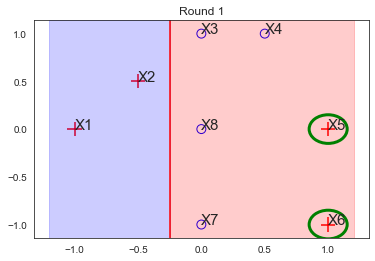

In [19]:
# Figure with decision stump.
# 1th round (iteration)
df = pd.read_csv("adaboost.txt") 
positives = df[df['actual'] >= 0]
negatives = df[df['actual'] < 0]

fig, ax = plt.subplots()
ax.scatter(positives['a1'], positives['a2'], marker='+', s=200*abs(positives['actual']), c='red')
ax.scatter(negatives['a1'], negatives['a2'], marker='o', s=80*abs(negatives['actual']), facecolors='none', edgecolors = 'blue')

for i, txt in enumerate(df['Type']):
    ax.annotate(txt, (df.iloc[i]['a1'],df.iloc[i]['a2']), ha='left', size=15)

ax.axvline(x=-0.25, color = 'r')
ax.axvspan(xmin=-0.25, xmax=1.2, alpha=0.2, color='#FF0000')
ax.axvspan(xmin=-1.2, xmax=-0.25, alpha=0.2, color='#0000FF')

circle1 = plt.Circle((1, 0), 0.15, color='g',fill=False, lw=3)
circle2 = plt.Circle((1, -1), 0.15, color='g', fill=False, lw=3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_title('Round 1')

plt.show()

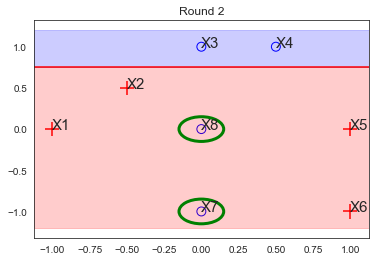

In [21]:
# 2th round (iteration)
df = pd.read_csv("adaboost.txt") 
positives = df[df['actual'] >= 0]
negatives = df[df['actual'] < 0]

fig, ax = plt.subplots()
ax.scatter(positives['a1'], positives['a2'], marker='+', s=200*abs(positives['actual']), c='red')
ax.scatter(negatives['a1'], negatives['a2'], marker='o', s=80*abs(negatives['actual']), facecolors='none', edgecolors = 'blue')

for i, txt in enumerate(df['Type']):
    ax.annotate(txt, (df.iloc[i]['a1'],df.iloc[i]['a2']), ha='left', size=15)

ax.axhline(y=0.75, color='r')
ax.axhspan(ymin=0.75, ymax=-1.2, alpha=0.2, color='#FF0000')
ax.axhspan(ymin=0.75, ymax=1.2, alpha=0.2, color='#0000FF')
circle1 = plt.Circle((0, -1), 0.15, color='g',fill=False, lw=3)
circle2 = plt.Circle((0, 0), 0.15, color='g', fill=False, lw=3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_title('Round 2')
plt.show()

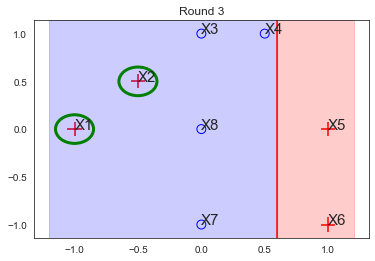

In [22]:
# 3th round (iteration)
df = pd.read_csv("adaboost.txt") 
positives = df[df['actual'] >= 0]
negatives = df[df['actual'] < 0]

fig, ax = plt.subplots()
ax.scatter(positives['a1'], positives['a2'], marker='+', s=200*abs(positives['actual']), c='red')
ax.scatter(negatives['a1'], negatives['a2'], marker='o', s=80*abs(negatives['actual']), facecolors='none', edgecolors = 'blue')

for i, txt in enumerate(df['Type']):
    ax.annotate(txt, (df.iloc[i]['a1'],df.iloc[i]['a2']), ha='left', size=15)

ax.axvline(x=0.6, color = 'r')
ax.axvspan(xmin=0.6, xmax=1.2, alpha=0.2, color='#FF0000')
ax.axvspan(xmin=0.6, xmax=-1.2, alpha=0.2, color='#0000FF')
circle1 = plt.Circle((-1, 0), 0.15, color='g',fill=False, lw=3)
circle2 = plt.Circle((-0.5, 0.5), 0.15, color='g', fill=False, lw=3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_title('Round 3')
plt.show()